In [ ]:

# Importing the neccesary modules
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
from dotenv import load_dotenv, dotenv_values
import os
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl


In [ ]:

# Spotify API authentication to acess to my personal Spotify data

load_dotenv() # Load environment variables from the .env file into the system environment

# Getting my Client ID which is stored in a variable in a .env file
client_id = os.getenv("SPOTIPY_CLIENT_ID")  # Spotify Client ID (from .env file)
client_secret = os.getenv("SPOTIPY_CLIENT_SECRET") # Spotify Client Secret (from .env file)
redirect_uri = "http://127.0.0.1:8888/callback" # Defining the redirect URI which matches the one specefied in my Spotify Developer Dashboard


# Setting up the Spotipy client with OAuth2 authentication
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    scope="user-top-read user-read-recently-played" # Defining what data my app is allowed to access
))


In [ ]:
top_tracks = sp.current_user_top_tracks(time_range='long_term', limit=50) # Fetching my top tracks data

tracks = top_tracks['items']

# Creating a DataFrame with some useful info
df_main = pd.DataFrame([{
    'name': track['name'],
    'artist': track['artists'][0]['name'],
    "artist_id": track["artists"][0]["id"],
    'album': track['album']['name'],
    'popularity': track['popularity'],
    'duration_ms': track['duration_ms'],
} for track in tracks])

df_main.head(10) # Checking that it works

,name,artist,artist_id,album,popularity,duration_ms
0,Anthem Part Two,blink-182,6FBDaR13swtiWwGhX1WQsP,Take Off Your Pants And Jacket,71,227200
1,ANTHEM PART 3,blink-182,6FBDaR13swtiWwGhX1WQsP,ONE MORE TIME...,48,213191
2,Feeling This,blink-182,6FBDaR13swtiWwGhX1WQsP,blink-182,72,172645
3,Stockholm Syndrome,blink-182,6FBDaR13swtiWwGhX1WQsP,blink-182,53,161135
4,Let Down,Radiohead,4Z8W4fKeB5YxbusRsdQVPb,OK Computer,89,299560
5,Pin the Grenade,blink-182,6FBDaR13swtiWwGhX1WQsP,NINE,51,179440
6,Here's Your Letter,blink-182,6FBDaR13swtiWwGhX1WQsP,blink-182,52,174658
7,DANCE WITH ME,blink-182,6FBDaR13swtiWwGhX1WQsP,ONE MORE TIME...,48,188155
8,Bobby Sox,Green Day,7oPftvlwr6VrsViSDV7fJY,Saviors,63,224310
9,When Your Heart Stops Beating,+44,7gkRNHOOt7QfhhXf0rEnmj,When Your Heart Stops Beating,54,192786


In [ ]:
# Doing some checks to make sure there is no obvious issues with the data.

print("missing values:")
print(df_main.isnull().sum()) #Checking for missing values

print()

print("duplicates:")
print(df_main.duplicated().sum()) #Checking for duplicates

print()

print("data types:")
print(df_main.dtypes) # Checking the data types


missing values:
name           0
artist         0
artist_id      0
album          0
popularity     0
duration_ms    0
dtype: int64

duplicates:
0

data types:
name           object
artist         object
artist_id      object
album          object
popularity      int64
duration_ms     int64
dtype: object


In [ ]:
# Adjusting the main DataFrame to add a genre column

unique_artist_ids = df_main['artist_id'].unique() #extracting the unique artist IDs from the main DataFrame

artist_genres = {} # Initialising an empty dictionary for genres to be stored for each artist

for artist_id in unique_artist_ids: # Looping through each unique artist ID
    artist_info = sp.artist(artist_id)  # Fetching information on the artist from SPotify API
    artist_genres[artist_id] = artist_info['genres']  # extracting and storing the genres associated with the artist

df_main['genres'] = df_main['artist_id'].map(artist_genres) # # Mapping the genres back to the main DataFrame based on artist_id

df_main.head(10) #Checking the first 10 rows

,name,artist,artist_id,album,popularity,duration_ms,genres
0,Anthem Part Two,blink-182,6FBDaR13swtiWwGhX1WQsP,Take Off Your Pants And Jacket,71,227200,"[pop punk, punk, rock, skate punk, emo]"
1,ANTHEM PART 3,blink-182,6FBDaR13swtiWwGhX1WQsP,ONE MORE TIME...,48,213191,"[pop punk, punk, rock, skate punk, emo]"
2,Feeling This,blink-182,6FBDaR13swtiWwGhX1WQsP,blink-182,72,172645,"[pop punk, punk, rock, skate punk, emo]"
3,Stockholm Syndrome,blink-182,6FBDaR13swtiWwGhX1WQsP,blink-182,53,161135,"[pop punk, punk, rock, skate punk, emo]"
4,Let Down,Radiohead,4Z8W4fKeB5YxbusRsdQVPb,OK Computer,89,299560,"[art rock, alternative rock]"
5,Pin the Grenade,blink-182,6FBDaR13swtiWwGhX1WQsP,NINE,51,179440,"[pop punk, punk, rock, skate punk, emo]"
6,Here's Your Letter,blink-182,6FBDaR13swtiWwGhX1WQsP,blink-182,52,174658,"[pop punk, punk, rock, skate punk, emo]"
7,DANCE WITH ME,blink-182,6FBDaR13swtiWwGhX1WQsP,ONE MORE TIME...,48,188155,"[pop punk, punk, rock, skate punk, emo]"
8,Bobby Sox,Green Day,7oPftvlwr6VrsViSDV7fJY,Saviors,63,224310,"[punk, pop punk]"
9,When Your Heart Stops Beating,+44,7gkRNHOOt7QfhhXf0rEnmj,When Your Heart Stops Beating,54,192786,"[pop punk, punk, skate punk]"


In [ ]:
df_exploded = df_main.explode('genres')# Exploding the genres column so that eah genre becomes its own row
genre_counts = df_exploded['genres'].value_counts().reset_index() # Counting the number of times each genre appears
genre_counts.columns = ['genre', 'listen_count'] # Giving the columns descriptive names

display(genre_counts) # Checking it worked

,genre,listen_count
0,pop punk,48
1,punk,46
2,emo,35
3,skate punk,34
4,rock,32
5,art rock,2
6,alternative rock,2


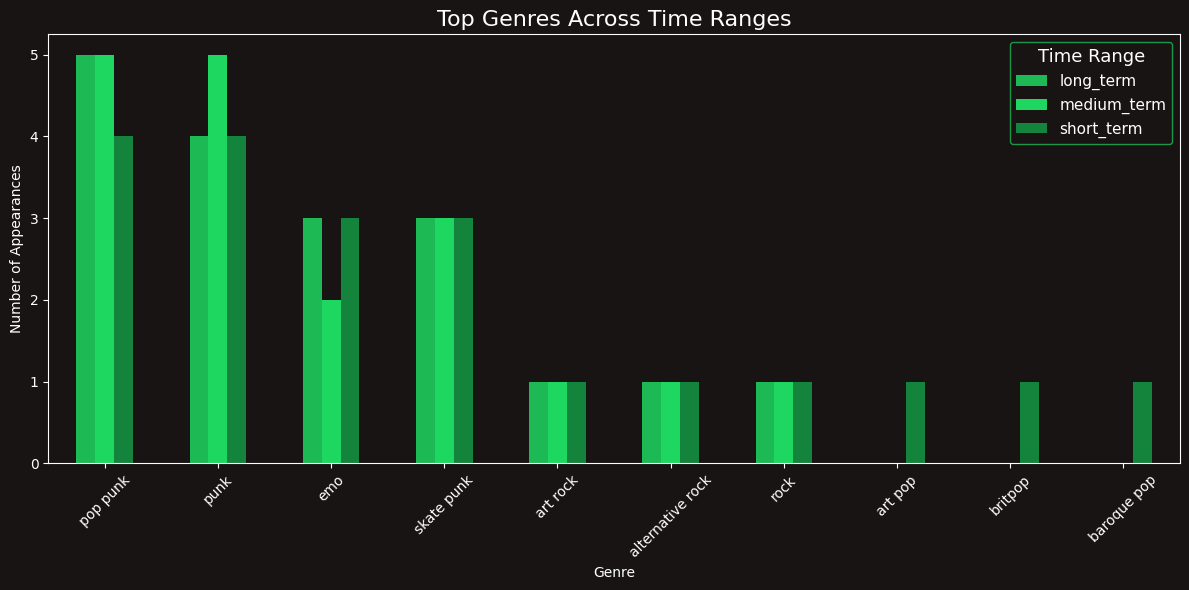

In [ ]:
# Analysing my top genres across different time ranges

# Creating a function to get my top genres
def get_top_genres(time_range, sp, limit=50): 
    # - time_range as a parameter for passing arguments for differenmt time ranges
    # - sp for flexible credentials and a default limit of 50

    top_tracks = sp.current_user_top_tracks(time_range=time_range, limit=limit) 
    # Fetching my top tracks with the specified time range passed
    
   
   
    artist_ids = [track['artists'][0]['id'] for track in top_tracks['items']] 
    # Extracting the first artist's ID from each track
    
    
    genre_counts = {}
    # Initialising a dictionary to keep count of genres

    for artist_id in set(artist_ids):  # avoiding duplicate API calls by using set
        artist_info = sp.artist(artist_id)
        # Fetching artist information from Spotify API

        for genre in artist_info['genres']:
              # For each genre the artist is tagged with, increment the count
            genre_counts[genre] = genre_counts.get(genre, 0) + 1
    
    df = pd.DataFrame(list(genre_counts.items()), columns=['genre', 'count'])
    # Convert genre count dictionary into a DataFrame
    
    df['time_range'] = time_range
    # Adding a column to identify the time range the data corresponds to

    return df
    # Return the DataFrame for that time range



# Getting top genres for different time ranges
df_short = get_top_genres('short_term', sp)
df_medium = get_top_genres('medium_term', sp)
df_long = get_top_genres('long_term', sp)



# Combining data from all time ranges into one DataFrame
df_genres_all = pd.concat([df_short, df_medium, df_long], ignore_index=True)

# Pivotting the combined DataFrame to have genres as rows and time ranges as columns
df_pivot = df_genres_all.pivot_table(index='genre', columns='time_range', values='count', fill_value=0)

# Sorting the genres based on their count in the long_term time range, descending order
df_pivot = df_pivot.sort_values(by='long_term', ascending=False)

# Defining Spotify colours
spotify_green = "#1DB954"
spotify_dark_bg = "#191414"
spotify_text = "#FFFFFF"

plt.style.use('dark_background')  # Start with dark background

# Plotting the top 10 genres as a grouped bar chart with different shades of green for each time range
ax = df_pivot.head(10).plot(kind='bar', figsize=(12, 6), color=[spotify_green, "#1ed760", "#14833b"])  

# Adding plot title and axis labels with Spotify text color
plt.title('Top Genres Across Time Ranges', color=spotify_text, fontsize=16)
plt.ylabel('Number of Appearances', color=spotify_text)
plt.xlabel('Genre', color=spotify_text)

# Rotating x-axis labels for readability and colouring the ticks
plt.xticks(rotation=45, color=spotify_text)
plt.yticks(color=spotify_text)

# Customising legend with title, font size, and Spotify dark background colour
plt.legend(title='Time Range', title_fontsize='13', fontsize='11', facecolor=spotify_dark_bg, edgecolor=spotify_green)

# Setting facecolour to Spotify dark
ax.set_facecolor(spotify_dark_bg)
plt.gcf().set_facecolor(spotify_dark_bg)

# Adjusting the layout so nothing overlaps
plt.tight_layout()

# Rendering the chart
plt.show()

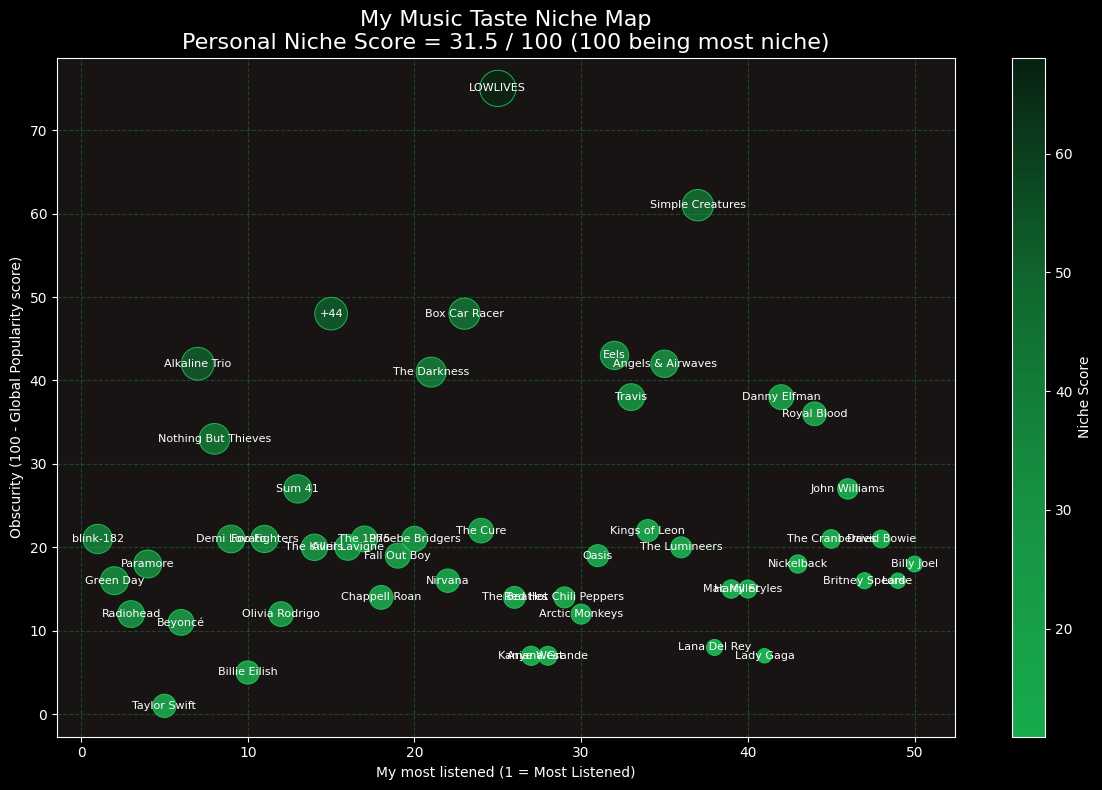

In [ ]:
# Analysing how niche my music taste is based on Spotifys global popularity score and how much I actually listen to each artist.

top_artists = sp.current_user_top_artists(time_range="long_term", limit=50) # Fetching my long term top artist data from Spotify API

artist_data = [] # Initialising a list to store data for my top artists 

for artist in top_artists["items"]: 
# Looping through each artist 

    # Appending the artist_data list with a dictionary for the artists name and their global popularity
    artist_data.append({
        "Artist": artist["name"],
        "Global Popularity Score": artist["popularity"]
        })

df_niche_artists = pd.DataFrame(artist_data) # Converting that artist data into a DataFrame 
df_niche_artists['rank'] = range(1, len(df_niche_artists) + 1) #Creatimg a rank column for where each artists ranks on my top artists list

# Inverting popularity (higher = more obscure)
df_niche_artists['inverse_popularity'] = 100 - df_niche_artists['Global Popularity Score']

# Normalising rank score (higher rank means more listened, so inverting and scaling)
df_niche_artists['rank_score'] = (len(df_niche_artists) + 1 - df_niche_artists['rank']) / len(df_niche_artists)

# Normalising popularity score to 0-1 scale
df_niche_artists['popularity_score'] = df_niche_artists['inverse_popularity'] / 100

# Calculating combined niche score. Weighting popularity 70% and rank(my listening) 30%
df_niche_artists['Niche Score'] = ((df_niche_artists['rank_score'] * 0.3) + (df_niche_artists['popularity_score'] * 0.7)) * 100

# Calculating my personal niche score
your_niche_score = df_niche_artists['Niche Score'].mean()




# Creating a scatter plot to visualise 

spotify_edge = "#1ED760"  # defining a lighter green for edges

plt.figure(figsize=(12, 8)) # Setting figure size


# Creates a scatter plot where:
# x-axis = artist rank (1 is most listened),
# y-axis = inverse popularity (100 - global popularity score),
# point size = Niche Score (scaled up),
# colour = also based on Niche Score using a Spotify-green gradient,
# transparency = 80%,
# edge colour = a predefined Spotify colour (e.g., dark green or black).
scatter = plt.scatter(
    df_niche_artists['rank'],
    df_niche_artists['inverse_popularity'],
    s=df_niche_artists['Niche Score'] * 10,  # Adjusting circle sizes
    c=df_niche_artists['Niche Score'],
    cmap=mpl.colors.LinearSegmentedColormap.from_list(
        "spotify_green", ["#1ED760", "#1DB954", "#14833b", "#0b2916"] #Creating a colour gradient
    ),
    alpha=0.8,
    edgecolors=spotify_edge,
    linewidth=0.7
)

# Looping through each artist and place their name as a label on the scatter plot
for _, row in df_niche_artists.iterrows():
    plt.text(row['rank'], row['inverse_popularity'], row['Artist'],
             fontsize=8, ha='center', va='center', color=spotify_text)




# Labeling the axes and title with Spotify-themed colours
plt.xlabel('My most listened (1 = Most Listened)', color=spotify_text)
plt.ylabel('Obscurity (100 - Global Popularity score)', color=spotify_text)
plt.title(f'My Music Taste Niche Map\nPersonal Niche Score = {your_niche_score:.1f} / 100 (100 being most niche)',
          color=spotify_text, fontsize=16)



# Adding a colour bar to represent the range of Niche Scores visually
cbar = plt.colorbar(scatter)
cbar.set_label('Niche Score', color=spotify_text)
cbar.ax.yaxis.set_tick_params(color=spotify_text)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=spotify_text)

# Adding a grid 
plt.grid(True, linestyle='--', alpha=0.3, color=spotify_green)

# Setting the background colour of the plot area to Spotify dark
plt.gca().set_facecolor(spotify_dark_bg)


plt.tight_layout() # Automatically adjusting layout to fit all elements cleanly


plt.show() # Rendering the chart




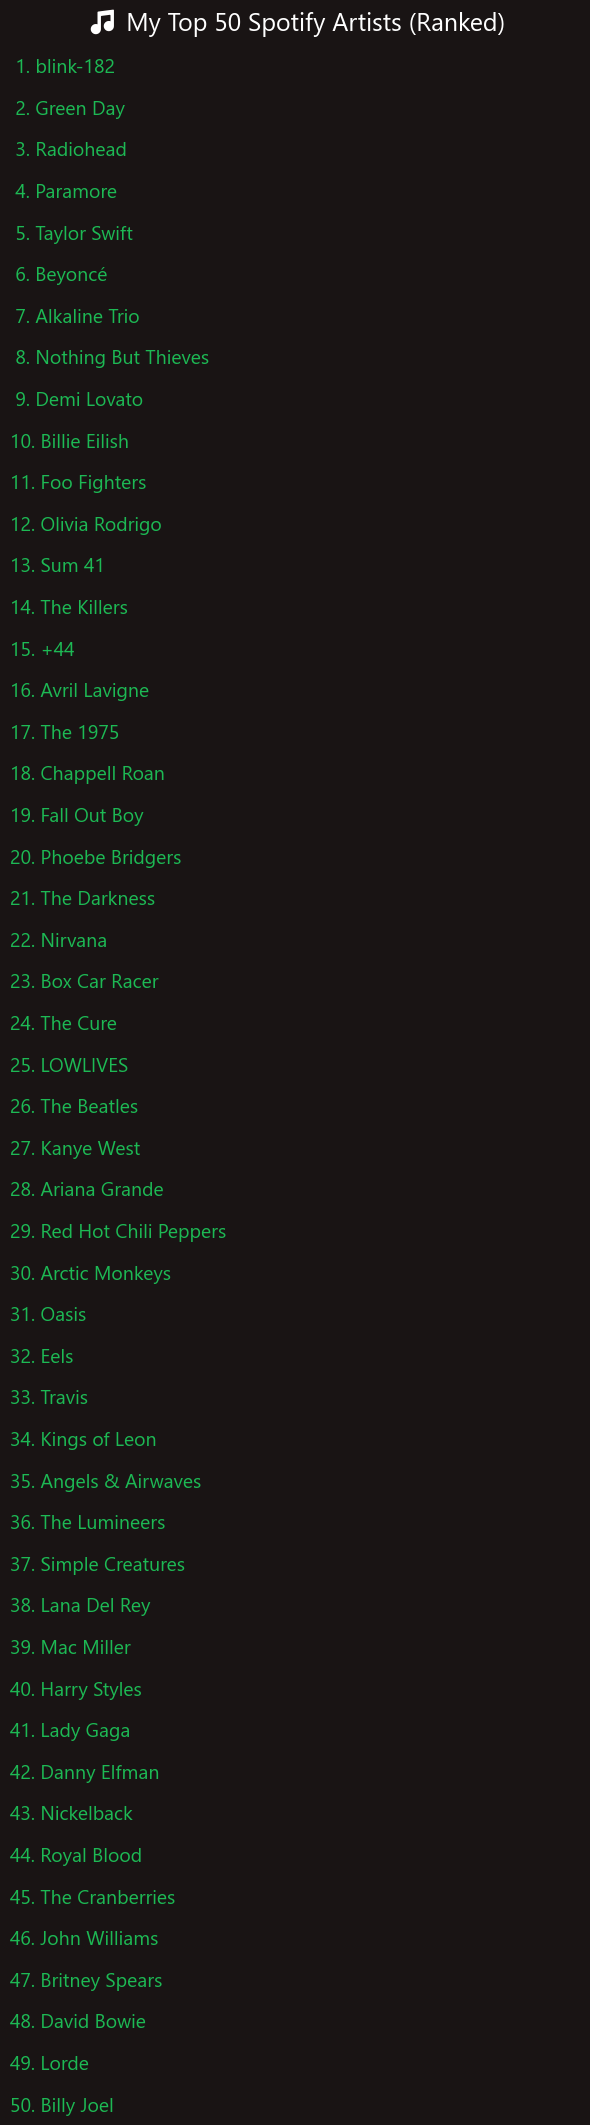

In [45]:
#Visualisintg my top artits list

top_artists = sp.current_user_top_artists(time_range="long_term", limit=50) # Fetching my top artists from Spotify API

my_artist_data = [] #Initialising a list to store secific artist data

# Looping through each artist and appending the list with a dictionary including their names
for specific_artist in top_artists["items"]:
    my_artist_data.append({
        "Artist": specific_artist["name"],
        })

df_my_top_artists = pd.DataFrame(my_artist_data) # Converting the artist list to a DataFrame
df_my_top_artists['rank'] = range(1, len(df_my_top_artists) + 1) # Adding a rank column


# Visualising the list

fig, ax = plt.subplots(figsize=(6, 14)) # Setting figure size
fig.patch.set_facecolor(spotify_dark_bg)  # Setting figure background

ax.axis('off') # Turning off the entire axis frame for the plot

# Prepare the ranked list text with some spacing
text_lines = [f"{row['rank']:>2}. {row['Artist']}" for _, row in df_my_top_artists.iterrows()]
text = "\n\n".join(text_lines)  # double newline for spacing

# Defining the font size, style and colour
ax.text(0, 1, text, fontsize=14, va='top', ha='left', color=spotify_green, family='Segoe UI Emoji', weight='bold') 
plt.title("🎵 My Top 50 Spotify Artists (Ranked)", fontsize=18, color=spotify_text, pad=20, weight='bold', fontfamily='Segoe UI Emoji')

plt.tight_layout() # Automatically adjusting layout to fit all elements cleanly

plt.show() # Rendering the list visual

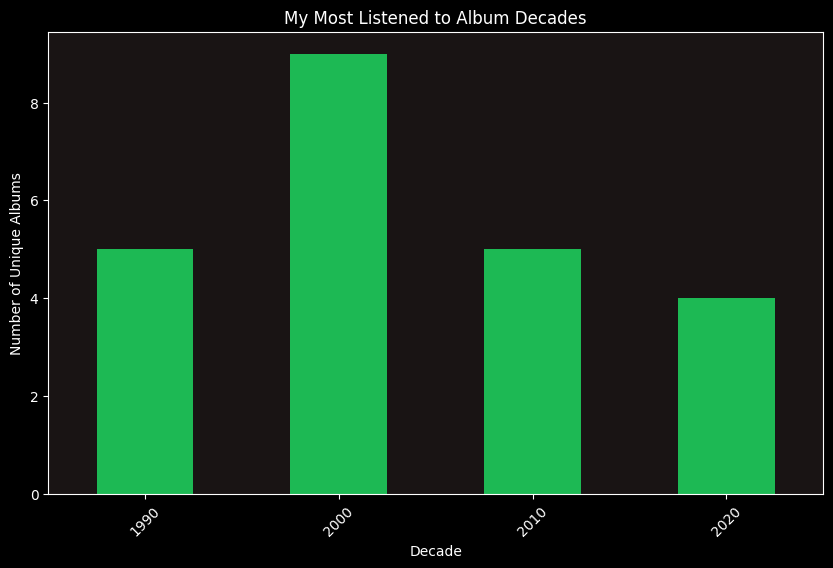

In [ ]:
# Visualising my most listned to decades based on my top albums release date

albums = [] # initialising an empty list to store album information

# Looping through each track in the top tracks list
for track in top_tracks['items']:
    album = track['album'] # Extracting the album info for the track
    album_id = album['id'] # Getting the unique album ID
    release_date = album['release_date']  # Getting the album's release date
    year = int(release_date.split('-')[0]) # Extracting just the year from the release date
    
    # Appending relevant album data as a dictionary to the albums list
    albums.append({
        'album_id': album_id,
        'album_name': album['name'],
        'release_year': year
    })

# Converting the album data into a DataFrame
# Dropping duplicate albums based on their unique ID so each album appears only once
df_albums = pd.DataFrame(albums).drop_duplicates(subset='album_id')

# Calculating decade
df_albums['decade'] = (df_albums['release_year'] // 10) * 10

# Counting albums per decade
decade_counts = df_albums['decade'].value_counts().sort_index()

# Plotting a bar chart

plt.figure(figsize=(10, 6)) # Setting the figure size

decade_counts.plot(kind='bar', color=spotify_green) # Setting the chart type and colour of the bars

# Labelling the chart
plt.title('My Most Listened to Album Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Unique Albums')


plt.xticks(rotation=45) # Rotating the axis labels by 45 degrees

plt.gca().set_facecolor(spotify_dark_bg) # Setting the face colour 

plt.show() # Rendering the chart